# Imports:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# In the name, says advanced regression techniques so might have to use advanced regression techniques?
!pip install kaggle # Installs kaggle so we can access kaggle datasets

In [3]:
# Install Kaggle and let Colab access your Kaggle API token so you can directly download the data
from google.colab import drive
drive.mount("/content/drive")

competition_name = "house-prices-advanced-regression-techniques"

!pip install kaggle --quiet

!mkdir ~/.kaggle
!cp "/content/drive/MyDrive/Kaggle/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c {competition_name}

!mkdir kaggle_data
!unzip {competition_name + ".zip"} -d kaggle_data

drive.flush_and_unmount()

Mounted at /content/drive
  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 69.5MB/s]
Archive:  house-prices-advanced-regression-techniques.zip
  inflating: kaggle_data/data_description.txt  
  inflating: kaggle_data/sample_submission.csv  
  inflating: kaggle_data/test.csv    
  inflating: kaggle_data/train.csv   


In [4]:
# Convert csv files to dfs:
test = pd.read_csv("/content/kaggle_data/test.csv")
train = pd.read_csv("/content/kaggle_data/train.csv")

In [5]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

# Data Cleaning:

## Encoding:

In [9]:
# Creating a list of the train/test columns to encode:
object_cols = train.select_dtypes(include=object)
object_cols = object_cols.columns
object_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [10]:
# The columns that need to be manually encoded since they have null values for train
train_cols_encoding = object_cols[train[object_cols].isna().sum() > 0]
train_cols_encoding

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')

In [11]:
# The columns that need to be manually encoded since they have null values for test
test_cols_encoding = object_cols[test[object_cols].isna().sum() > 0]
test_cols_encoding

Index(['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType'],
      dtype='object')

In [12]:
# Gives how test has more random null values
diff = []
for i in test_cols_encoding:
  if i not in train_cols_encoding:
    diff.append(i)
for i in diff:
  print(i, "-", test[i].isnull().sum(), "null values in test.")

MSZoning - 4 null values in test.
Utilities - 2 null values in test.
Exterior1st - 1 null values in test.
Exterior2nd - 1 null values in test.
KitchenQual - 1 null values in test.
Functional - 2 null values in test.
SaleType - 1 null values in test.


In [13]:
# Replacing all the null values in test with the most common values in test & train for each feature
test['MSZoning'].fillna('RL', inplace = True)
test['Utilities'].fillna('AllPub', inplace = True)
test['Exterior1st'].fillna('VinylSd', inplace = True)
test['Exterior2nd'].fillna('VinylSd', inplace = True)
test['KitchenQual'].fillna('TA', inplace = True)
test['Functional'].fillna('Typ', inplace = True)
test['Functional'].fillna('WD', inplace = True)

### Fixing 'BsmtQual' for Test:

In [14]:
# Train has no 'BsmtQual' null with 'Unf' for 'BsmtFinType1' or 'BstmFinType2'
cols_to_check = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'SalePrice']
temp_train = (train['BsmtFinType1'] == 'Unf')
train[cols_to_check][temp_train]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,SalePrice
8,TA,TA,No,Unf,0,Unf,0,952,952,0,0,129900
13,Gd,TA,Av,Unf,0,Unf,0,1494,1494,0,0,279500
15,TA,TA,No,Unf,0,Unf,0,832,832,0,0,132000
20,Ex,TA,Av,Unf,0,Unf,0,1158,1158,0,0,325300
21,TA,TA,No,Unf,0,Unf,0,637,637,0,0,139400
...,...,...,...,...,...,...,...,...,...,...,...,...
1448,Fa,TA,No,Unf,0,Unf,0,560,560,0,0,112000
1450,Gd,TA,No,Unf,0,Unf,0,896,896,0,0,136000
1451,Gd,TA,No,Unf,0,Unf,0,1573,1573,0,0,287090
1453,Gd,TA,No,Unf,0,Unf,0,1140,1140,0,0,84500


In [15]:
# Test, on the other hand, has a 'BsmtQual' null with 'Unf' for 'BsmtFinType1' and 'BsmtFinType2', which makes no sense since there should be a basement quality rating if there are basement condition and finished type values
cols_to_check = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
temp = test['BsmtQual'].isna()
# Number of null in 'BsmtQual' for test
print(test['BsmtQual'].isna().sum())
# Table
test[cols_to_check][temp]

44


,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
125,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
133,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
269,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
318,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
354,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
387,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
388,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
396,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
397,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
398,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [16]:
# Replacing the 'BsmtQual' null values with 'TA' since it's the most likely value
temp_two = test[(test['BsmtFinType1'] == 'Unf') & (test['BsmtQual'].isna())]
temp_two['BsmtQual'].fillna('TA', inplace = True)
test[(test['BsmtFinType1'] == 'Unf') & (test['BsmtQual'].isna())] = temp_two
# Number of null in 'BsmtQual' for test
print(test['BsmtQual'].isna().sum())
# Table
test[cols_to_check][temp]

42


<ipython-input-16-f1e1a4b5d220>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_two['BsmtQual'].fillna('TA', inplace = True)


,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
125,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
133,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
269,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
318,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
354,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
387,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
388,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
396,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
397,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
398,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


### Fixing 'GarageQual' for Test:

In [17]:
# Train has no 'GarageQual' null with 'Detchd' for 'GarageType'
print(train['GarageType'].isna().sum())
cols_to_check = ['GarageQual', 'GarageFinish', 'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageCars', 'GarageArea']
temp_train = (train['GarageType'] == 'Detchd')
train[cols_to_check][temp_train]

81


,GarageQual,GarageFinish,GarageCond,GarageType,GarageYrBlt,GarageCars,GarageArea
3,TA,Unf,TA,Detchd,1998.0,3,642
8,Fa,Unf,TA,Detchd,1931.0,2,468
10,TA,Unf,TA,Detchd,1965.0,1,384
12,TA,Unf,TA,Detchd,1962.0,1,352
15,TA,Unf,TA,Detchd,1991.0,2,576
...,...,...,...,...,...,...,...
1436,TA,Unf,TA,Detchd,1974.0,2,528
1440,TA,Fin,TA,Detchd,1993.0,2,672
1443,Fa,Unf,Po,Detchd,1916.0,1,192
1445,TA,Unf,TA,Detchd,1990.0,1,240


In [18]:
# Test, on the other hand, has a 'GarageQual' null with 'Detchd' for 'GarageType', which makes no sense since there should be a garage quality rating if a detached type garage exists.
cols_to_check = ['GarageQual', 'GarageFinish', 'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageCars', 'GarageArea']
temp = test['GarageQual'].isna()
# Number of null in 'GarageQual' for test
print(test['GarageQual'].isna().sum())
# Table
test[cols_to_check][temp]

78


,GarageQual,GarageFinish,GarageCond,GarageType,GarageYrBlt,GarageCars,GarageArea
53,NaN,NaN,NaN,NaN,NaN,0.0,0.0
71,NaN,NaN,NaN,NaN,NaN,0.0,0.0
79,NaN,NaN,NaN,NaN,NaN,0.0,0.0
92,NaN,NaN,NaN,NaN,NaN,0.0,0.0
96,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...
1433,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1449,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1453,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1454,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [19]:
# The 'GarageType' value on index 1116 on the above Test table is the only non-null value, so that's probably a mistake and we can swap that with a null value
test['GarageType'][1116] = np.nan
test[cols_to_check][temp]

<ipython-input-19-0db0b438da59>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['GarageType'][1116] = np.nan


,GarageQual,GarageFinish,GarageCond,GarageType,GarageYrBlt,GarageCars,GarageArea
53,NaN,NaN,NaN,NaN,NaN,0.0,0.0
71,NaN,NaN,NaN,NaN,NaN,0.0,0.0
79,NaN,NaN,NaN,NaN,NaN,0.0,0.0
92,NaN,NaN,NaN,NaN,NaN,0.0,0.0
96,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...
1433,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1449,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1453,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1454,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [20]:
# For index 666, we need to fill in the 'GarageQual', 'GarageCond', 'GarageFinish'. 'GarageYrBlt' will be filled in later during imputation
# Starting off with predicting 'GarageCond' from 'GarageCars' and 'GarageArea'
cols_to_check = ['GarageQual', 'GarageFinish', 'GarageCond', 'GarageType', 'GarageCars', 'GarageArea']
temp_train = (train['GarageType'] == 'Detchd')
model_data = train[cols_to_check][temp_train]

# Creating test/train
from sklearn.model_selection import train_test_split
y = model_data['GarageCond']
X = model_data[['GarageCars', 'GarageArea']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
pred_info = pd.DataFrame([[1.0, 360.0]], columns = ['GarageCars', 'GarageArea'])

# Train and guage accuracy on random forest model
from sklearn.ensemble import RandomForestClassifier
rtc = RandomForestClassifier(n_estimators = 50)
rtc.fit(X_train, y_train)
print("Accuracy on GarageCond:", rtc.score(X_test, y_test))

# Retrain on the entire set and find the prediction
rtc.fit(X, y)
pred = rtc.predict(pred_info)
print("Prediction for GarageCond:", pred)

# Predicting 'GarageFinish' from 'GarageCars' and 'GarageArea'
y = model_data['GarageFinish']
X = model_data[['GarageCars', 'GarageArea']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
rtc = RandomForestClassifier(n_estimators = 50)
rtc.fit(X_train, y_train)
print("Accuracy on GarageFinish:", rtc.score(X_test, y_test))
rtc.fit(X, y)
pred = rtc.predict(pred_info)
print("Prediction for GarageFinish:", pred)

# Predicting 'GarageQual' from 'GarageCars' and 'GarageArea'
y = model_data['GarageQual']
X = model_data[['GarageCars', 'GarageArea']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
rtc = RandomForestClassifier(n_estimators = 50)
rtc.fit(X_train, y_train)
print("Accuracy on GarageQual:", rtc.score(X_test, y_test))
rtc.fit(X, y)
pred = rtc.predict(pred_info)
print("Prediction for GarageQual:", pred)

# These predictiosn match up with my intuition since those are the most common values and we can impute index 666 based on these values
test['GarageCond'][666] = 'TA'
test['GarageFinish'][666] = 'Unf'
test['GarageQual'][666] = 'TA'
test[cols_to_check][temp]

Accuracy on GarageCond: 0.8515625
Prediction for GarageCond: ['TA']
Accuracy on GarageFinish: 0.9296875
Prediction for GarageFinish: ['Unf']
Accuracy on GarageQual: 0.8671875
Prediction for GarageQual: ['TA']


<ipython-input-20-a55e61841772>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['GarageCond'][666] = 'TA'
<ipython-input-20-a55e61841772>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['GarageFinish'][666] = 'Unf'
<ipython-input-20-a55e61841772>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['GarageQual'][666] = 'TA'


,GarageQual,GarageFinish,GarageCond,GarageType,GarageCars,GarageArea
53,NaN,NaN,NaN,NaN,0.0,0.0
71,NaN,NaN,NaN,NaN,0.0,0.0
79,NaN,NaN,NaN,NaN,0.0,0.0
92,NaN,NaN,NaN,NaN,0.0,0.0
96,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...
1433,NaN,NaN,NaN,NaN,0.0,0.0
1449,NaN,NaN,NaN,NaN,0.0,0.0
1453,NaN,NaN,NaN,NaN,0.0,0.0
1454,NaN,NaN,NaN,NaN,0.0,0.0


In [21]:
temp = test['GarageQual'].isna()
test[cols_to_check][temp]

,GarageQual,GarageFinish,GarageCond,GarageType,GarageCars,GarageArea
53,NaN,NaN,NaN,NaN,0.0,0.0
71,NaN,NaN,NaN,NaN,0.0,0.0
79,NaN,NaN,NaN,NaN,0.0,0.0
92,NaN,NaN,NaN,NaN,0.0,0.0
96,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...
1433,NaN,NaN,NaN,NaN,0.0,0.0
1449,NaN,NaN,NaN,NaN,0.0,0.0
1453,NaN,NaN,NaN,NaN,0.0,0.0
1454,NaN,NaN,NaN,NaN,0.0,0.0


### Fixing 'PoolQC' for Test:

In [22]:
cols_to_check = ['PoolQC', 'PoolArea']
temp = train['PoolQC'].isna()
# Number of null in 'PoolQC' for train
print(train['PoolQC'].isna().sum())
# Table
train[cols_to_check][temp]

1453


,PoolQC,PoolArea
0,NaN,0
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0
...,...,...
1455,NaN,0
1456,NaN,0
1457,NaN,0
1458,NaN,0


In [23]:
cols_to_check = ['PoolQC', 'PoolArea']
temp = test['PoolQC'].isna()
# Number of null in 'PoolQC' for test
print(test['PoolQC'].isna().sum())
# Finding the pools that have an area larger than 0 when no pool exists
holder = test[cols_to_check][temp]
holder[holder['PoolArea'] > 0]

1456


,PoolQC,PoolArea
960,NaN,368
1043,NaN,444
1139,NaN,561


In [24]:
test['PoolArea'][960] = 0
test['PoolArea'][1043] = 0
test['PoolArea'][1139] = 0

<ipython-input-24-799de7799b1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['PoolArea'][960] = 0
<ipython-input-24-799de7799b1a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['PoolArea'][1043] = 0
<ipython-input-24-799de7799b1a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['PoolArea'][1139] = 0


In [25]:
cols_to_check = ['PoolQC', 'PoolArea']
temp = test['PoolQC'].isna()
# Finding the pools that have an area larger than 0 when no pool exists
holder = test[cols_to_check][temp]
holder[holder['PoolArea'] > 0]

,PoolQC,PoolArea


### Encoding The Rest:

In [26]:
# Encoding Alley and replacing nan with 0 since the nan represents no alley access
train['Alley'].fillna(0, inplace = True)
train['Alley'].replace('Grvl', 1, inplace = True)
train['Alley'].replace('Pave', 2, inplace = True)
# Encoding Street using the same encoding map since it corresponds to Alley
train['Street'].replace('Grvl', 1, inplace = True)
train['Street'].replace('Pave', 2, inplace = True)
# Encoding MasVnrType and replacing nan with 0 since the nan represents no masonry veneer type
train['MasVnrType'].fillna(0, inplace = True)
train['MasVnrType'].replace('None', 0, inplace = True)
train['MasVnrType'].replace('CBlock', 1, inplace = True)
train['MasVnrType'].replace('BrkCmn', 2, inplace = True)
train['MasVnrType'].replace('BrkFace', 3, inplace = True)
train['MasVnrType'].replace('Stone', 4, inplace = True)
# Encoding BsmtQual and replacing nan with 0 since the nan represents no basement
train['BsmtQual'].fillna(0, inplace = True)
train['BsmtQual'].replace('Po', 1, inplace = True)
train['BsmtQual'].replace('Fa', 2, inplace = True)
train['BsmtQual'].replace('TA', 3, inplace = True)
train['BsmtQual'].replace('Gd', 4, inplace = True)
train['BsmtQual'].replace('Ex', 5, inplace = True)
# Encoding BsmtCond and replacing nan with 0 since the nan represents no basement
train['BsmtCond'].fillna(0, inplace = True)
train['BsmtCond'].replace('Po', 1, inplace = True)
train['BsmtCond'].replace('Fa', 2, inplace = True)
train['BsmtCond'].replace('TA', 3, inplace = True)
train['BsmtCond'].replace('Gd', 4, inplace = True)
train['BsmtCond'].replace('Ex', 5, inplace = True)
# Encoding BsmtExposure and replacing nan with 0 since nan represents no basement
train['BsmtExposure'].fillna(0, inplace = True)
train['BsmtExposure'].replace('No', 1, inplace = True)
train['BsmtExposure'].replace('Mn', 2, inplace = True)
train['BsmtExposure'].replace('Av', 3, inplace = True)
train['BsmtExposure'].replace('Gd', 4, inplace = True)
# Encoding BsmtFinType1 and replacing the nan with 0 since nan represents no basement
train['BsmtFinType1'].fillna(0, inplace = True)
train['BsmtFinType1'].replace('Unf', 1, inplace = True)
train['BsmtFinType1'].replace('LwQ', 2, inplace = True)
train['BsmtFinType1'].replace('Rec', 3, inplace = True)
train['BsmtFinType1'].replace('BLQ', 4, inplace = True)
train['BsmtFinType1'].replace('ALQ', 5, inplace = True)
train['BsmtFinType1'].replace('GLQ', 6, inplace = True)
# Encoding BsmtFinType2 and replacing the nan with 0 since nan represents no basement
train['BsmtFinType2'].fillna(0, inplace = True)
train['BsmtFinType2'].replace('Unf', 1, inplace = True)
train['BsmtFinType2'].replace('LwQ', 2, inplace = True)
train['BsmtFinType2'].replace('Rec', 3, inplace = True)
train['BsmtFinType2'].replace('BLQ', 4, inplace = True)
train['BsmtFinType2'].replace('ALQ', 5, inplace = True)
train['BsmtFinType2'].replace('GLQ', 6, inplace = True)
# Encoding Electrical and replacing the 1 nan value with 1 since nan will represent Mixed
train['Electrical'].fillna(1, inplace = True)
train['Electrical'].replace('Mix', 1, inplace = True)
train['Electrical'].replace('FuseP', 2, inplace = True)
train['Electrical'].replace('FuseF', 3, inplace = True)
train['Electrical'].replace('FuseA', 4, inplace = True)
train['Electrical'].replace('SBrkr', 5, inplace = True)
# Encoding FireplaceQu and replacing the nan with 0 since nan represents no fireplace
train['FireplaceQu'].fillna(0, inplace = True)
train['FireplaceQu'].replace('Po', 1, inplace = True)
train['FireplaceQu'].replace('Fa', 2, inplace = True)
train['FireplaceQu'].replace('TA', 3, inplace = True)
train['FireplaceQu'].replace('Gd', 4, inplace = True)
train['FireplaceQu'].replace('Ex', 5, inplace = True)
# Encoding GarageType and replacing the nan with 0 since nan represents no garage
train['GarageType'].fillna(0, inplace = True)
train['GarageType'].replace('CarPort', 1, inplace = True)
train['GarageType'].replace('BuiltIn', 2, inplace = True)
train['GarageType'].replace('Attchd', 3, inplace = True)
train['GarageType'].replace('Basment', 4, inplace = True)
train['GarageType'].replace('Detchd', 5, inplace = True)
train['GarageType'].replace('2Types', 6, inplace = True)
# Encoding GarageFinish and replacing the nan with 0 since nan represents no garage
train['GarageFinish'].fillna(0, inplace = True)
train['GarageFinish'].replace('Unf', 1, inplace = True)
train['GarageFinish'].replace('RFn', 2, inplace = True)
train['GarageFinish'].replace('Fin', 3, inplace = True)
# Encoding GarageQual and replacing the nan with 0 since nan represents no garage
train['GarageQual'].fillna(0, inplace = True)
train['GarageQual'].replace('Po', 1, inplace = True)
train['GarageQual'].replace('Fa', 2, inplace = True)
train['GarageQual'].replace('TA', 3, inplace = True)
train['GarageQual'].replace('Gd', 4, inplace = True)
train['GarageQual'].replace('Ex', 5, inplace = True)
# Encoding GarageCond and replacing the nan with 0 since nan represents no garage
train['GarageCond'].fillna(0, inplace = True)
train['GarageCond'].replace('Po', 1, inplace = True)
train['GarageCond'].replace('Fa', 2, inplace = True)
train['GarageCond'].replace('TA', 3, inplace = True)
train['GarageCond'].replace('Gd', 4, inplace = True)
train['GarageCond'].replace('Ex', 5, inplace = True)
# Encoding PoolQC and replacing nan with 0 since nan represents no pool
train['PoolQC'].fillna(0, inplace = True)
train['PoolQC'].replace('Fa', 1, inplace = True)
train['PoolQC'].replace('TA', 2, inplace = True)
train['PoolQC'].replace('Gd', 3, inplace = True)
train['PoolQC'].replace('Ex', 4, inplace = True)
# Encoding Fence and replacing nan with 0 since nan represents no fence
train['Fence'].fillna(0, inplace = True)
train['Fence'].replace('MnPrv', 1, inplace = True)
train['Fence'].replace('MnWw', 2, inplace = True)
train['Fence'].replace('GdPrv', 3, inplace = True)
train['Fence'].replace('GdWo', 4, inplace = True)
# Encoding MiscFeature and replacing nan with 0 since nan represents no misc features
train['MiscFeature'].fillna(0, inplace = True)
train['MiscFeature'].replace('Shed', 1, inplace = True)
train['MiscFeature'].replace('Gar2', 2, inplace = True)
train['MiscFeature'].replace('Othr', 3, inplace = True)
train['MiscFeature'].replace('TenC', 4, inplace = True)
train['MiscFeature'].replace('Elev', 5, inplace = True)

# Doing the same for test
test['Alley'].fillna(0, inplace = True)
test['Alley'].replace('Grvl', 1, inplace = True)
test['Alley'].replace('Pave', 2, inplace = True)
test['Street'].replace('Grvl', 1, inplace = True)
test['Street'].replace('Pave', 2, inplace = True)
test['MasVnrType'].fillna(0, inplace = True)
test['MasVnrType'].replace('None', 0, inplace = True)
test['MasVnrType'].replace('CBlock', 1, inplace = True)
test['MasVnrType'].replace('BrkCmn', 2, inplace = True)
test['MasVnrType'].replace('BrkFace', 3, inplace = True)
test['MasVnrType'].replace('Stone', 4, inplace = True)

test['BsmtQual'].fillna(0, inplace = True)
test['BsmtQual'].replace('Po', 1, inplace = True)
test['BsmtQual'].replace('Fa', 2, inplace = True)
test['BsmtQual'].replace('TA', 3, inplace = True)
test['BsmtQual'].replace('Gd', 4, inplace = True)
test['BsmtQual'].replace('Ex', 5, inplace = True)

test['BsmtCond'].fillna(0, inplace = True)
test['BsmtCond'].replace('Po', 1, inplace = True)
test['BsmtCond'].replace('Fa', 2, inplace = True)
test['BsmtCond'].replace('TA', 3, inplace = True)
test['BsmtCond'].replace('Gd', 4, inplace = True)
test['BsmtCond'].replace('Ex', 5, inplace = True)

test['BsmtExposure'].fillna(0, inplace = True)
test['BsmtExposure'].replace('No', 1, inplace = True)
test['BsmtExposure'].replace('Mn', 2, inplace = True)
test['BsmtExposure'].replace('Av', 3, inplace = True)
test['BsmtExposure'].replace('Gd', 4, inplace = True)

test['BsmtFinType1'].fillna(0, inplace = True)
test['BsmtFinType1'].replace('Unf', 1, inplace = True)
test['BsmtFinType1'].replace('LwQ', 2, inplace = True)
test['BsmtFinType1'].replace('Rec', 3, inplace = True)
test['BsmtFinType1'].replace('BLQ', 4, inplace = True)
test['BsmtFinType1'].replace('ALQ', 5, inplace = True)
test['BsmtFinType1'].replace('GLQ', 6, inplace = True)

test['BsmtFinType2'].fillna(0, inplace = True)
test['BsmtFinType2'].replace('Unf', 1, inplace = True)
test['BsmtFinType2'].replace('LwQ', 2, inplace = True)
test['BsmtFinType2'].replace('Rec', 3, inplace = True)
test['BsmtFinType2'].replace('BLQ', 4, inplace = True)
test['BsmtFinType2'].replace('ALQ', 5, inplace = True)
test['BsmtFinType2'].replace('GLQ', 6, inplace = True)

test['Electrical'].fillna(1, inplace = True)
test['Electrical'].replace('Mix', 1, inplace = True)
test['Electrical'].replace('FuseP', 2, inplace = True)
test['Electrical'].replace('FuseF', 3, inplace = True)
test['Electrical'].replace('FuseA', 4, inplace = True)
test['Electrical'].replace('SBrkr', 5, inplace = True)

test['FireplaceQu'].fillna(0, inplace = True)
test['FireplaceQu'].replace('Po', 1, inplace = True)
test['FireplaceQu'].replace('Fa', 2, inplace = True)
test['FireplaceQu'].replace('TA', 3, inplace = True)
test['FireplaceQu'].replace('Gd', 4, inplace = True)
test['FireplaceQu'].replace('Ex', 5, inplace = True)

test['GarageType'].fillna(0, inplace = True)
test['GarageType'].replace('CarPort', 1, inplace = True)
test['GarageType'].replace('BuiltIn', 2, inplace = True)
test['GarageType'].replace('Attchd', 3, inplace = True)
test['GarageType'].replace('Basment', 4, inplace = True)
test['GarageType'].replace('Detchd', 5, inplace = True)
test['GarageType'].replace('2Types', 6, inplace = True)

test['GarageFinish'].fillna(0, inplace = True)
test['GarageFinish'].replace('Unf', 1, inplace = True)
test['GarageFinish'].replace('RFn', 2, inplace = True)
test['GarageFinish'].replace('Fin', 3, inplace = True)

test['GarageQual'].fillna(0, inplace = True)
test['GarageQual'].replace('Po', 1, inplace = True)
test['GarageQual'].replace('Fa', 2, inplace = True)
test['GarageQual'].replace('TA', 3, inplace = True)
test['GarageQual'].replace('Gd', 4, inplace = True)
test['GarageQual'].replace('Ex', 5, inplace = True)

test['GarageCond'].fillna(0, inplace = True)
test['GarageCond'].replace('Po', 1, inplace = True)
test['GarageCond'].replace('Fa', 2, inplace = True)
test['GarageCond'].replace('TA', 3, inplace = True)
test['GarageCond'].replace('Gd', 4, inplace = True)
test['GarageCond'].replace('Ex', 5, inplace = True)

test['PoolQC'].fillna(0, inplace = True)
test['PoolQC'].replace('Fa', 1, inplace = True)
test['PoolQC'].replace('TA', 2, inplace = True)
test['PoolQC'].replace('Gd', 3, inplace = True)
test['PoolQC'].replace('Ex', 4, inplace = True)

test['Fence'].fillna(0, inplace = True)
test['Fence'].replace('MnPrv', 1, inplace = True)
test['Fence'].replace('MnWw', 2, inplace = True)
test['Fence'].replace('GdPrv', 3, inplace = True)
test['Fence'].replace('GdWo', 4, inplace = True)

test['MiscFeature'].fillna(0, inplace = True)
test['MiscFeature'].replace('Shed', 1, inplace = True)
test['MiscFeature'].replace('Gar2', 2, inplace = True)
test['MiscFeature'].replace('Othr', 3, inplace = True)
test['MiscFeature'].replace('TenC', 4, inplace = True)
test['MiscFeature'].replace('Elev', 5, inplace = True)

In [27]:
# Remove id column and have a holder array for that
house_ids = test['Id']
test = test.drop('Id', axis = 1)
train = train.drop('Id', axis = 1)
# Combine train/test to get standard label encoding, can split it up later
train['TrainSet'] = 1
test['TrainSet'] = 0
df = pd.concat([train, test]).reset_index(drop=True)

In [28]:
# Creating the cols that should be label encoded
label_encode_cols = ['LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
                     'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
                     'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
                     'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType',
                     'SaleCondition', 'MSZoning']

# Label encoding the columns
from sklearn.preprocessing import LabelEncoder
df[label_encode_cols] = df[label_encode_cols].apply(LabelEncoder().fit_transform)

In [29]:
train = df[df['TrainSet'] == 1].drop('TrainSet', axis = 1)
test = df[df['TrainSet'] == 0].drop(['TrainSet', 'SalePrice'], axis = 1)

## Imputation:

In [30]:
# Train columns to impute since they have null values
train_cols = train.columns[train.isna().sum() > 0]
print("Train:", train_cols)

# Test columns to impute since they have null values
test_cols = test.columns[test.isna().sum() > 0]
print("Test:", test_cols)

Train: Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')
Test: Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')


In [31]:
# Finding the number of unique values for each col
print("TRAIN:")
for i in train_cols:
  print(i, "has", train[i].nunique(), "unqiue values.")

print("\nTEST:")
for i in test_cols:
  print(i, "has", test[i].nunique(), "unqiue values.")

TRAIN:
LotFrontage has 110 unqiue values.
MasVnrArea has 327 unqiue values.
GarageYrBlt has 97 unqiue values.

TEST:
LotFrontage has 115 unqiue values.
MasVnrArea has 303 unqiue values.
BsmtFinSF1 has 669 unqiue values.
BsmtFinSF2 has 161 unqiue values.
BsmtUnfSF has 793 unqiue values.
TotalBsmtSF has 736 unqiue values.
BsmtFullBath has 4 unqiue values.
BsmtHalfBath has 3 unqiue values.
GarageYrBlt has 97 unqiue values.
GarageCars has 6 unqiue values.
GarageArea has 459 unqiue values.


In [32]:
# Print out the number of null values per column and percentage for train
print("TRAIN:")
for i in train_cols:
  print(i, "has", train[i].isna().sum(), "null values and", str(train[i].isna().sum()/1460) + "% of it is null.")

print("\nTEST:")
# Print out the number of null values per column and percentage for test
for i in test_cols:
  print(i, "has", test[i].isna().sum(), "null values and", str(test[i].isna().sum()/1460) + "% of it is null.")

TRAIN:
LotFrontage has 259 null values and 0.1773972602739726% of it is null.
MasVnrArea has 8 null values and 0.005479452054794521% of it is null.
GarageYrBlt has 81 null values and 0.05547945205479452% of it is null.

TEST:
LotFrontage has 227 null values and 0.15547945205479452% of it is null.
MasVnrArea has 15 null values and 0.010273972602739725% of it is null.
BsmtFinSF1 has 1 null values and 0.0006849315068493151% of it is null.
BsmtFinSF2 has 1 null values and 0.0006849315068493151% of it is null.
BsmtUnfSF has 1 null values and 0.0006849315068493151% of it is null.
TotalBsmtSF has 1 null values and 0.0006849315068493151% of it is null.
BsmtFullBath has 2 null values and 0.0013698630136986301% of it is null.
BsmtHalfBath has 2 null values and 0.0013698630136986301% of it is null.
GarageYrBlt has 78 null values and 0.05342465753424658% of it is null.
GarageCars has 1 null values and 0.0006849315068493151% of it is null.
GarageArea has 1 null values and 0.0006849315068493151% of 

### Bsmt Imputation

In [33]:
cols_to_check = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
temp = test['BsmtQual'] == 0
# Table
test[cols_to_check][temp]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
1585,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1593,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1729,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1778,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1814,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1847,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1848,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1856,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1857,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1858,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0


In [34]:
# Imputing all the NaN with 0
test['BsmtFinSF1'][2120] = 0.0
test['BsmtFinSF2'][2120] = 0.0
test['BsmtUnfSF'][2120] = 0.0
test['TotalBsmtSF'][2120] = 0.0
test['BsmtFullBath'][2120] = 0.0
test['BsmtHalfBath'][2120] = 0.0

test['BsmtHalfBath'][2188] = 0.0
test['BsmtFullBath'][2188] = 0.0

<ipython-input-34-c9ed022088e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['BsmtFinSF1'][2120] = 0.0
<ipython-input-34-c9ed022088e2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['BsmtFinSF2'][2120] = 0.0
<ipython-input-34-c9ed022088e2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['BsmtUnfSF'][2120] = 0.0
<ipython-input-34-c9ed022088e2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [35]:
cols_to_check = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
temp = test['BsmtQual'] == 0
# Table
test[cols_to_check][temp]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
1585,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1593,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1729,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1778,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1814,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1847,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1848,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1856,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1857,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
1858,0,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0


### GarageYrBlt Imputation

In [36]:
# The number of houses with a GarageType of 0 (no garages) equals the null values for GarageYrBlt
print((train['GarageType'] == 0).sum())
# Manual inspection of the table shows the null values for GarageYrBlt are houses without garages, so I'll just input the YearBuilt value
train[['YearBuilt', 'GarageType', 'GarageYrBlt']]

81


,YearBuilt,GarageType,GarageYrBlt
0,2003,3,2003.0
1,1976,3,1976.0
2,2001,3,2001.0
3,1915,5,1998.0
4,2000,3,2000.0
...,...,...,...
1455,1999,3,1999.0
1456,1978,3,1978.0
1457,1941,3,1941.0
1458,1950,3,1950.0


In [37]:
# Impute the null values by replacing them with the YearBuilt values
train['GarageYrBlt'].fillna(train['YearBuilt'], inplace = True)
test['GarageYrBlt'].fillna(test['YearBuilt'], inplace = True)
train[['YearBuilt', 'GarageType', 'GarageYrBlt']]

,YearBuilt,GarageType,GarageYrBlt
0,2003,3,2003.0
1,1976,3,1976.0
2,2001,3,2001.0
3,1915,5,1998.0
4,2000,3,2000.0
...,...,...,...
1455,1999,3,1999.0
1456,1978,3,1978.0
1457,1941,3,1941.0
1458,1950,3,1950.0


In [38]:
print("TRAIN GarageYrBlt has", train['GarageYrBlt'].isna().sum(), "null values and", str(train['GarageYrBlt'].isna().sum()/1460) + "% of it is null.")
print("TEST GarageYrBlt has", test['GarageYrBlt'].isna().sum(), "null values and", str(test['GarageYrBlt'].isna().sum()/1460) + "% of it is null.")

TRAIN GarageYrBlt has 0 null values and 0.0% of it is null.
TEST GarageYrBlt has 0 null values and 0.0% of it is null.


### Rest of Garage Imputation

In [39]:
cols_to_check = ['GarageQual', 'GarageFinish', 'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageCars', 'GarageArea']
temp = test['GarageType'] == 0
# Table
test[cols_to_check][temp]

,GarageQual,GarageFinish,GarageCond,GarageType,GarageYrBlt,GarageCars,GarageArea
1513,0,0,0,0,1962.0,0.0,0.0
1531,0,0,0,0,1920.0,0.0,0.0
1539,0,0,0,0,1910.0,0.0,0.0
1552,0,0,0,0,1912.0,0.0,0.0
1556,0,0,0,0,1915.0,0.0,0.0
...,...,...,...,...,...,...,...
2893,0,0,0,0,1916.0,0.0,0.0
2909,0,0,0,0,1970.0,0.0,0.0
2913,0,0,0,0,1970.0,0.0,0.0
2914,0,0,0,0,1970.0,0.0,0.0


In [40]:
# Imputing all the NaN with 0
test['GarageCars'][2576] = 0.0
test['GarageArea'][2576] = 0.0

<ipython-input-40-fc1aa9529481>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['GarageCars'][2576] = 0.0
<ipython-input-40-fc1aa9529481>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['GarageArea'][2576] = 0.0


In [41]:
cols_to_check = ['GarageQual', 'GarageFinish', 'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageCars', 'GarageArea']
temp = test['GarageType'] == 0
# Table
test[cols_to_check][temp]

,GarageQual,GarageFinish,GarageCond,GarageType,GarageYrBlt,GarageCars,GarageArea
1513,0,0,0,0,1962.0,0.0,0.0
1531,0,0,0,0,1920.0,0.0,0.0
1539,0,0,0,0,1910.0,0.0,0.0
1552,0,0,0,0,1912.0,0.0,0.0
1556,0,0,0,0,1915.0,0.0,0.0
...,...,...,...,...,...,...,...
2893,0,0,0,0,1916.0,0.0,0.0
2909,0,0,0,0,1970.0,0.0,0.0
2913,0,0,0,0,1970.0,0.0,0.0
2914,0,0,0,0,1970.0,0.0,0.0


### MasVnrArea Imputation

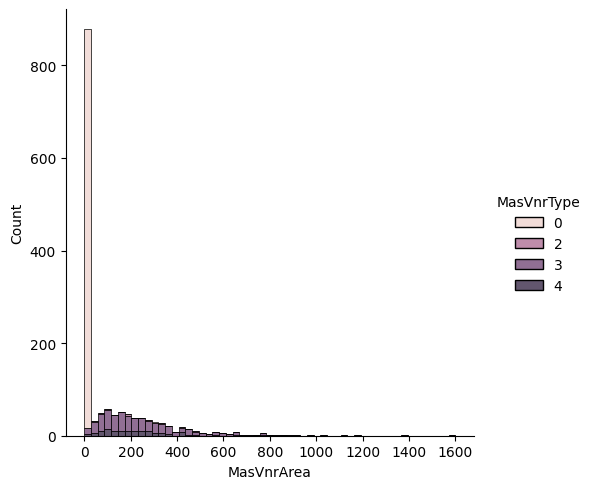

In [42]:
# Shows that a lot of houses don't even have masonry veneer so we can impute based on the type of masonry veneer (if no masony veneer -> 0 area)
sns.displot(data = train, x = 'MasVnrArea', hue = 'MasVnrType', multiple = 'stack')
train['MasVnrArea'] = np.where(train['MasVnrType'] == 0, 0, train['MasVnrArea'])
test['MasVnrArea'] = np.where(test['MasVnrType'] == 0, 0, test['MasVnrArea'])

In [43]:
print("TRAIN MasVnrArea has", train['MasVnrArea'].isna().sum(), "null values and", str(train['MasVnrArea'].isna().sum()/1460) + "% of it is null.")
print("TEST MasVnrArea has", test['MasVnrArea'].isna().sum(), "null values and", str(test['MasVnrArea'].isna().sum()/1460) + "% of it is null.")

TRAIN MasVnrArea has 0 null values and 0.0% of it is null.
TEST MasVnrArea has 0 null values and 0.0% of it is null.


### LotFrontage Imputation

In [44]:
# Combine test and training to create a train df for a LotFrontage prediction model
train_no_null = train.dropna(axis = 0, subset = 'LotFrontage')
test_no_null = test.dropna(axis = 0, subset = 'LotFrontage')
model_data = pd.concat([train_no_null, test_no_null]).reset_index(drop=True)
model_data.drop('SalePrice', axis = 1, inplace = True)
y = model_data['LotFrontage']
X = model_data.drop('LotFrontage', axis = 1)
# Create test/train splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)
base_train = train[train['LotFrontage'].isna()].drop(['SalePrice', 'LotFrontage'], axis = 1)
base_test = test[test['LotFrontage'].isna()].drop('LotFrontage', axis = 1)

In [45]:
!pip install catboost
import catboost
from catboost import CatBoostRegressor
cat=CatBoostRegressor(iterations=500, loss_function='RMSE', verbose = 0)
cat.fit(X_train,y_train)
cat.score(X_test, y_test)
cat.fit(X, y)
pred_train = cat.predict(base_train)
pred_test = cat.predict(base_test)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 3.5 MB/s eta 0:00:00


In [46]:
# Getting rid of the trailing decimals since that isn't in the actual data
pred_train = np.asarray(pred_train, dtype = 'int')
pred_train = np.asarray(pred_train, dtype = 'float64')
pred_test = np.asarray(pred_test, dtype = 'int')
pred_test = np.asarray(pred_test, dtype = 'float64')

In [47]:
# Populating the 'LotFrontage' null in train
temp_arr = base_train.index
counter = 0
for i in temp_arr:
  train['LotFrontage'][i] = pred_train[counter]
  counter = counter + 1

<ipython-input-47-3faacae6f320>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['LotFrontage'][i] = pred_train[counter]


In [48]:
# Populating the 'LotFrontage' null in test
temp_arr = base_test.index
counter = 0
for i in temp_arr:
  test['LotFrontage'][i] = pred_test[counter]
  counter = counter + 1

<ipython-input-48-aaaadd385cab>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LotFrontage'][i] = pred_test[counter]


### Checking Imputation is Finished:

In [49]:
print("Number of Cols with null values in TRAIN:", (train.isna().sum() > 0).sum())
print("Number of Cols with null values in TEST:", (test.isna().sum() > 0).sum())

Number of Cols with null values in TRAIN: 0
Number of Cols with null values in TEST: 0


In [50]:
# Print out the number of null values per column and percentage for train
print("TRAIN:")
for i in train_cols:
  print(i, "has", train[i].isna().sum(), "null values and", str(train[i].isna().sum()/1460) + "% of it is null.")

print("\nTEST:")
# Print out the number of null values per column and percentage for test
for i in test_cols:
  print(i, "has", test[i].isna().sum(), "null values and", str(test[i].isna().sum()/1460) + "% of it is null.")

TRAIN:
LotFrontage has 0 null values and 0.0% of it is null.
MasVnrArea has 0 null values and 0.0% of it is null.
GarageYrBlt has 0 null values and 0.0% of it is null.

TEST:
LotFrontage has 0 null values and 0.0% of it is null.
MasVnrArea has 0 null values and 0.0% of it is null.
BsmtFinSF1 has 0 null values and 0.0% of it is null.
BsmtFinSF2 has 0 null values and 0.0% of it is null.
BsmtUnfSF has 0 null values and 0.0% of it is null.
TotalBsmtSF has 0 null values and 0.0% of it is null.
BsmtFullBath has 0 null values and 0.0% of it is null.
BsmtHalfBath has 0 null values and 0.0% of it is null.
GarageYrBlt has 0 null values and 0.0% of it is null.
GarageCars has 0 null values and 0.0% of it is null.
GarageArea has 0 null values and 0.0% of it is null.


# Models:

In [51]:
y = train['SalePrice']
X = train.drop('SalePrice', axis = 1)
# Create test/train splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)

## Random Forest Regressor Model:

In [52]:
# Creating the random forest model
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators = 100, max_depth=50)
rf.fit(X_train,y_train)
print(rf.score(X_test, y_test))

0.8705431604334126


In [53]:
rf.fit(X, y)
rf_preds = rf.predict(test)

## CatBoost Regressor Model:

In [54]:
!pip install catboost
import catboost
from catboost import CatBoostRegressor

In [55]:
# Creating the CatBoost model
cat=CatBoostRegressor(iterations=300, loss_function='RMSE', verbose = 0)
cat.fit(X_train,y_train)
cat.score(X_test, y_test)

0.8838206712898153

In [56]:
cat.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 300,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'learning_rate': 0.10858099907636642,
 'score_function': 'C

In [57]:
cat.fit(X, y)
cat_preds = cat.predict(test)

## XGBoost Regressor Model:

In [58]:
# Creating the XGBoot model with hypertuned parameters
import xgboost
xgb = xgboost.XGBRegressor(learning_rate=0.01, n_estimators=3460, max_depth=3, min_child_weight=0, gamma=0, subsample=0.7, colsample_bytree=0.7, objective='reg:linear', nthread=-1, scale_pos_weight=1, seed=27, reg_alpha=0.00006, random_state=42)
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

[04:34:49] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


0.8833107274929628

In [59]:
xgb.fit(X, y)
xgb_preds = xgb.predict(test)

[04:35:26] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


## LightGBM Regressor Model:

In [60]:
# Creating the LGBM model with hypertuned parameters
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(objective='regression', num_leaves=4, learning_rate=0.01, n_estimators=5000,max_bin=200, bagging_fraction=0.75, bagging_freq=5, bagging_seed=7, feature_fraction=0.2, feature_fraction_seed=7, verbose=-1)
lgbm.fit(X_train, y_train)
lgbm.score(X_test, y_test)

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75


0.8808904385981868

In [61]:
lgbm.fit(X, y)
lgbm_preds = lgbm.predict(test)

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75


## Gradient Boosting Regressor:

In [62]:
# Creating the Gradient Boosting model with hypertuned parameters
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =42)

In [63]:
gbr.fit(X_train, y_train)
gbr.score(X_test, y_test)

0.8984173101674603

In [64]:
gbr.fit(X, y)
gbr_preds = gbr.predict(test)

# Submission:

In [65]:
# "Averaging" all the model predictions to get an overall better estimate
import math
temp = cat_preds*xgb_preds
temp_preds = []
for i in temp:
  temp_preds.append(math.sqrt(i))

temp = temp_preds*lgbm_preds
temp_preds2 = []
for i in temp:
  temp_preds2.append(math.sqrt(i))

temp = gbr_preds*temp_preds2
preds = []
for i in temp:
  preds.append(math.sqrt(i))

In [66]:
# Creates the submission dataframe
preds = pd.Series(preds)
submission_df = pd.DataFrame()
submission_df['Id'] = house_ids
submission_df['SalePrice'] = preds
submission_df

,Id,SalePrice
0,1461,119865.821821
1,1462,160852.258397
2,1463,188161.111040
3,1464,189945.319627
4,1465,186615.711346
...,...,...
1454,2915,79731.186146
1455,2916,75760.017203
1456,2917,165073.138590
1457,2918,121664.383027


In [67]:
# Creates the csv file
submission_df.to_csv('submission.csv', index = False)